In [20]:
from mrmr import mrmr_classif
import numpy as np
import pandas as pd

In [21]:
X = pd.read_csv('../active_datasets/all_features_train.csv')
y = pd.read_csv('../active_datasets/y_train.csv', header=None)
X.head()

,amount,degree_centrality_merchant,degree_centrality_customer,lpa_merchant,lpa_customer,page_rank_merchant,page_rank_customer,page_rank_w_merchant,page_rank_w_customer,closeness_centrality_merchant,...,load_centrality_w_customer,second_order_centrality_merchant,second_order_centrality_customer,laplacian_centrality_merchant,laplacian_centrality_customer,laplacian_centrality_w_merchant,laplacian_centrality_w_customer,merchant_fraud_rate,customer_fraud_rate,category_fraud_rate
0,0.004867,1.000000,0.661616,0.000000,0.000000,1.000000,0.523272,1.000000,0.084538,0.789021,...,0.0,0.001702,0.314869,1.000000,0.875789,1.000000,0.380034,0.0,0.0,0.0
1,0.004637,1.000000,0.646465,0.000000,0.000000,1.000000,0.512898,1.000000,0.077348,0.789021,...,0.0,0.001702,0.229225,1.000000,0.862666,1.000000,0.369500,0.0,0.0,0.0
2,0.007397,1.000000,0.560606,0.000000,0.333333,1.000000,0.465147,1.000000,0.227793,0.789021,...,0.0,0.001702,0.174133,1.000000,0.656955,1.000000,0.490342,0.0,0.0,0.0
3,0.004951,0.087344,0.621212,0.000000,0.000000,0.087438,0.495358,0.120384,0.085681,0.694392,...,0.0,0.002694,0.266688,0.007717,0.794129,0.014715,0.390876,0.0,0.0,0.0
4,0.000569,0.685885,0.666667,0.666667,0.666667,0.717123,0.544826,0.699216,0.085182,1.000000,...,0.0,0.000000,0.199037,0.470651,0.704291,0.469946,0.339209,0.0,0.0,0.0


In [22]:
mrmr_out = mrmr_classif(X=X, y=y, K=len(X.columns), return_scores=True)

100%|██████████| 24/24 [00:13<00:00,  1.83it/s]


In [23]:
a, b, c = mrmr_out

<AxesSubplot: xlabel='Feature', ylabel='MRMR score'>

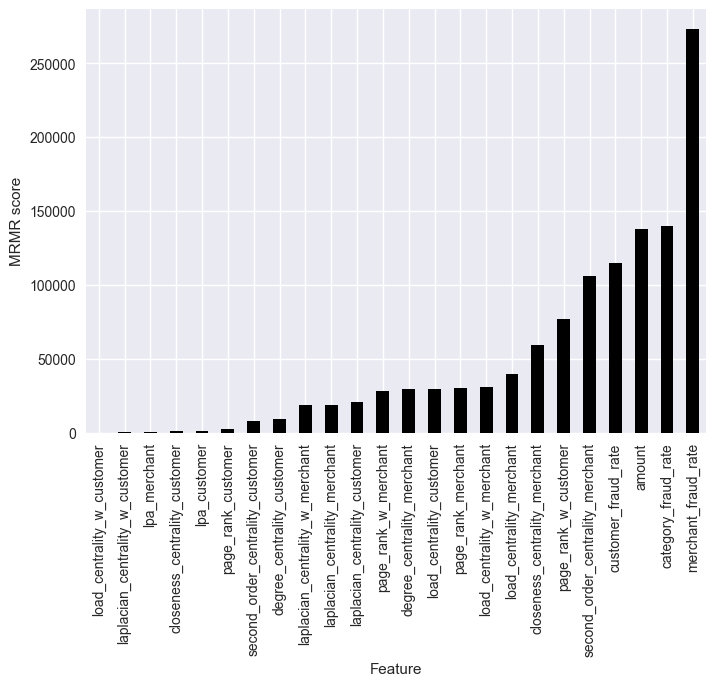

In [44]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')#change the style sheets here
b.sort_values().plot.bar(colormap=plt.cm.gray, xlabel = 'Feature', ylabel = 'MRMR score')

In [25]:
best_features = b.sort_values(ascending=False)

In [45]:
all_features_train = X
all_features_test = pd.read_csv('../active_datasets/all_features_test.csv')
for k in range(len(best_features)):
    k_best_train = all_features_train[best_features.index[:k+1]]
    k_best_test = all_features_test[best_features.index[:k+1]]
    #k_best_train.to_csv(f'../active_datasets/{k+1}_best_features_train.csv', index=False)
    #k_best_test.to_csv(f'../active_datasets/{k+1}_best_features_test.csv', index=False)
    print(k_best_test.columns)

Index(['merchant_fraud_rate'], dtype='object')
Index(['merchant_fraud_rate', 'category_fraud_rate'], dtype='object')
Index(['merchant_fraud_rate', 'category_fraud_rate', 'amount'], dtype='object')
Index(['merchant_fraud_rate', 'category_fraud_rate', 'amount',
       'customer_fraud_rate'],
      dtype='object')
Index(['merchant_fraud_rate', 'category_fraud_rate', 'amount',
       'customer_fraud_rate', 'second_order_centrality_merchant'],
      dtype='object')
Index(['merchant_fraud_rate', 'category_fraud_rate', 'amount',
       'customer_fraud_rate', 'second_order_centrality_merchant',
       'page_rank_w_customer'],
      dtype='object')
Index(['merchant_fraud_rate', 'category_fraud_rate', 'amount',
       'customer_fraud_rate', 'second_order_centrality_merchant',
       'page_rank_w_customer', 'closeness_centrality_merchant'],
      dtype='object')
Index(['merchant_fraud_rate', 'category_fraud_rate', 'amount',
       'customer_fraud_rate', 'second_order_centrality_merchant',
       

In [30]:
df_24_features = pd.read_csv('../active_datasets/24_best_features_train.csv')
df_all_features = pd.read_csv('../active_datasets/all_features_train.csv')
set(df_24_features.columns) == set(df_all_features.columns)

True

In [34]:
df_24_features = df_24_features[df_all_features.columns]

In [40]:
(df_24_features != df_all_features).sum().sum()

0